In [13]:
from src import analysis_modules
import MDAnalysis as mda
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 25})

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
colours = {"DOPC": "#00dddd",
           "POPC": "#6a6adf",
           "POPE": "#ffb753"}

In [16]:
out_dir = "figures/Plots/"

# DOPC & POPC

In [17]:
results = "example_results/"

DOPC_POPC_10 = results + "DOPC_POPC_10.csv"

DOPC_POPC_20 = results + "DOPC_POPC_20.csv"

DOPC_POPC_30 = results + "DOPC_POPC_30.csv"

POPC_POPE_10 = results + "POPC_POPE_10.csv"

POPC_POPE_20 = results + "POPC_POPE_20.csv"

POPC_POPE_30 = results + "POPC_POPE_30.csv"

<module 'matplotlib.pyplot' from '/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/matplotlib/pyplot.py'>

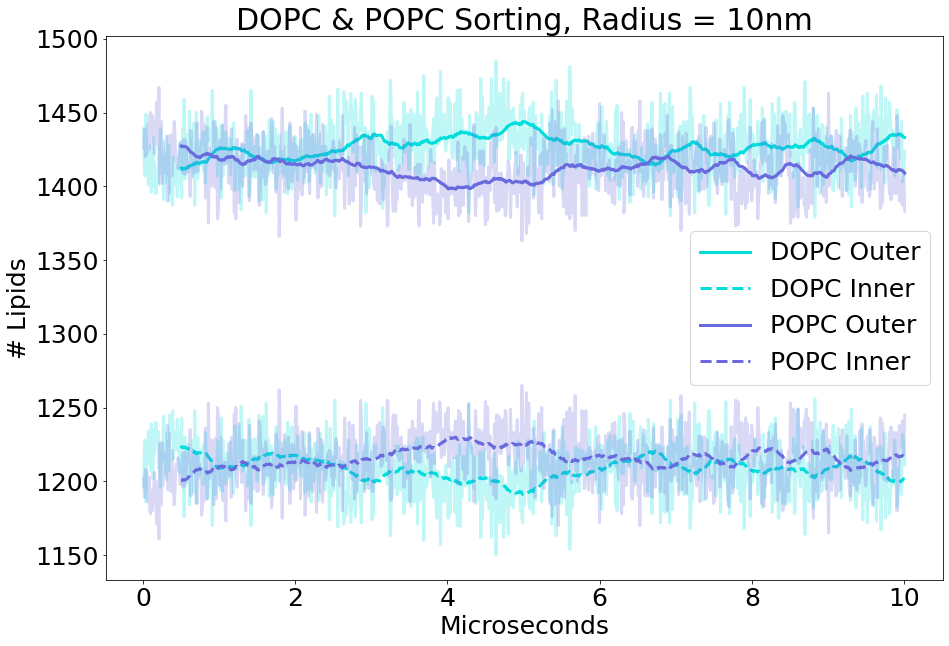

In [56]:
analysis_modules.csv_to_plot(DOPC_POPC_10, ["DOPC", "POPC"], rolling=50, bg=True,\
                    title="DOPC & POPC Sorting, Radius = 10nm", colours=colours, index_scaling=100, \
                    x_label = "Microseconds", out=out_dir + "DOPC_POPC_r10.png")

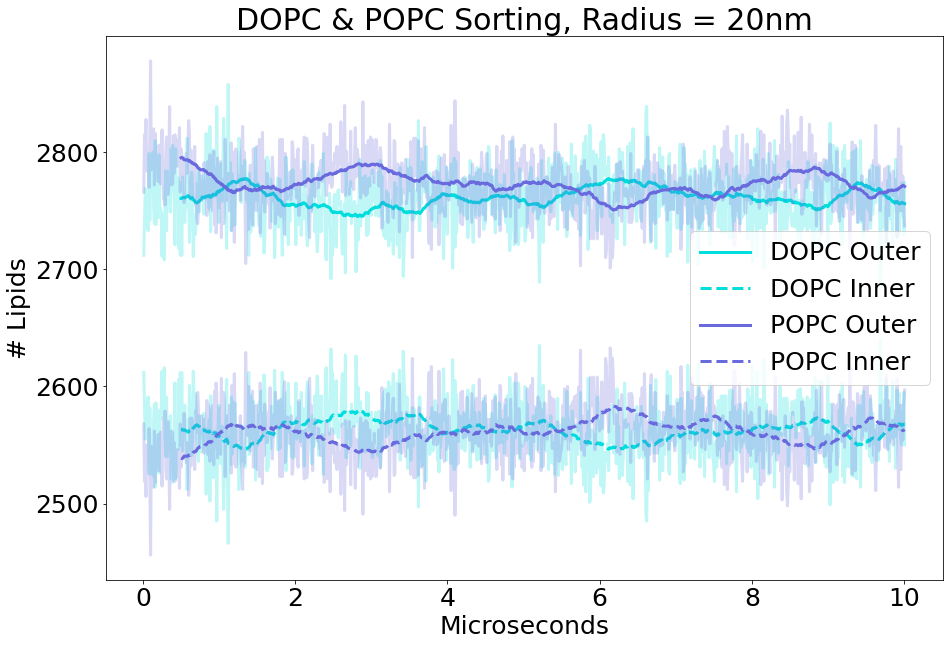

In [26]:
analysis_modules.csv_to_plot(DOPC_POPC_20, ["DOPC", "POPC"], rolling=50, bg = True, title="DOPC & POPC Sorting, Radius = 20nm", colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "DOPC_POPC_r20.png")

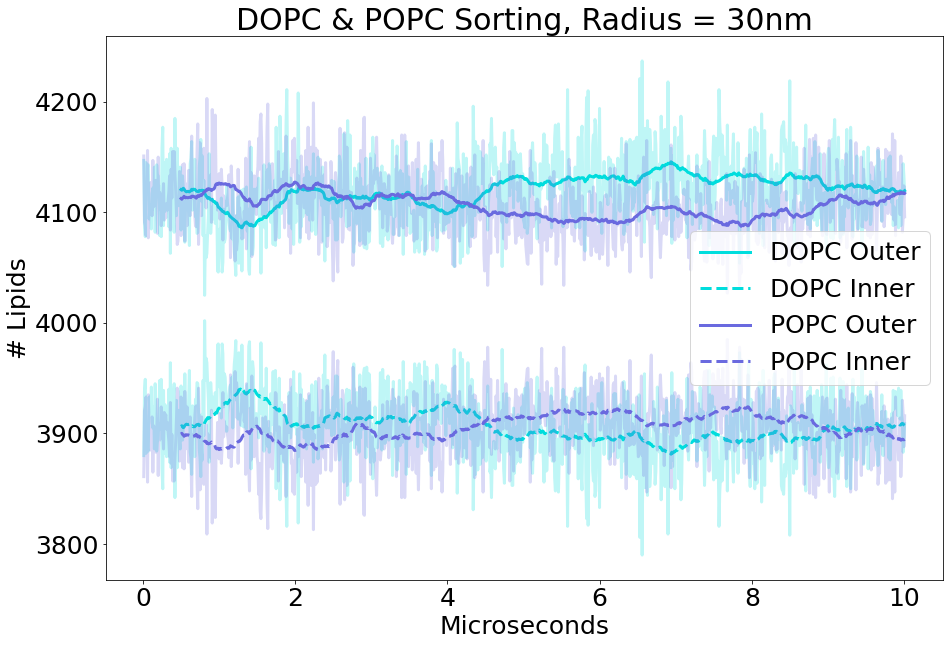

In [27]:
analysis_modules.csv_to_plot(DOPC_POPC_30, ["DOPC", "POPC"], rolling=50, bg = True, title="DOPC & POPC Sorting, Radius = 30nm", colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "DOPC_POPC_r30.png")

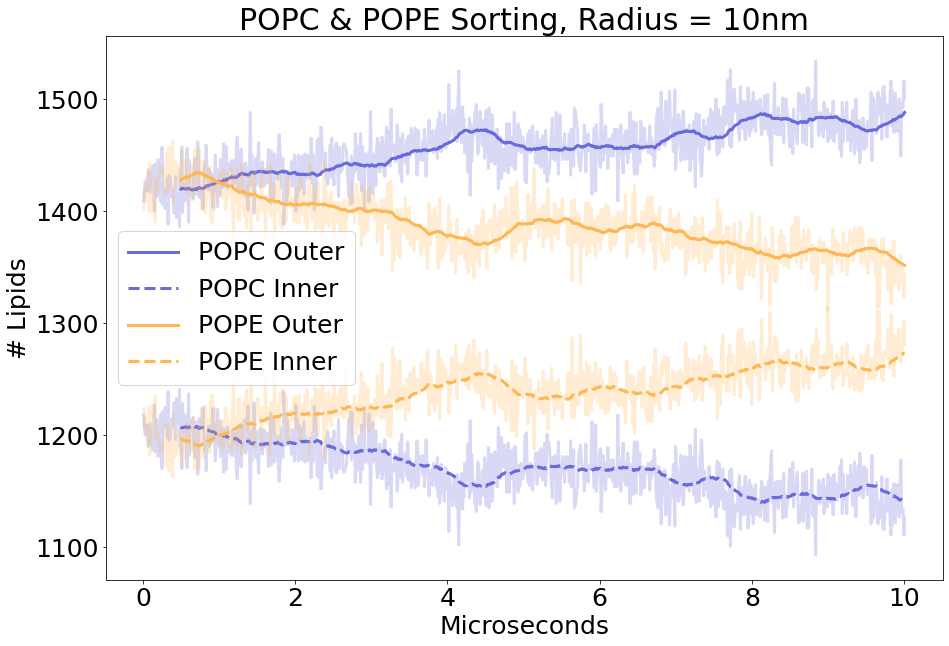

In [28]:
analysis_modules.csv_to_plot(POPC_POPE_10, ["POPC", "POPE"], bg = True, title="POPC & POPE Sorting, Radius = 10nm", rolling=50, colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "POPC_POPE_r10.png")

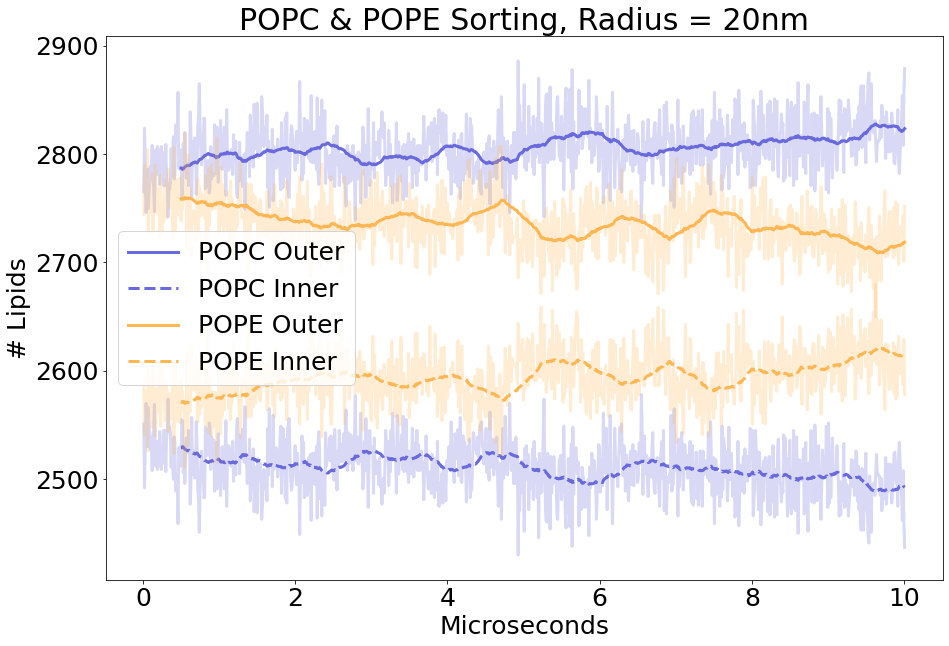

In [31]:
analysis_modules.csv_to_plot(POPC_POPE_20, ["POPC", "POPE"], title="POPC & POPE Sorting, Radius = 20nm", rolling=50, \
                             bg=True, colours=colours, index_scaling=100, \
                             x_label = "Microseconds", out=out_dir + "POPC_POPE_r20.png")

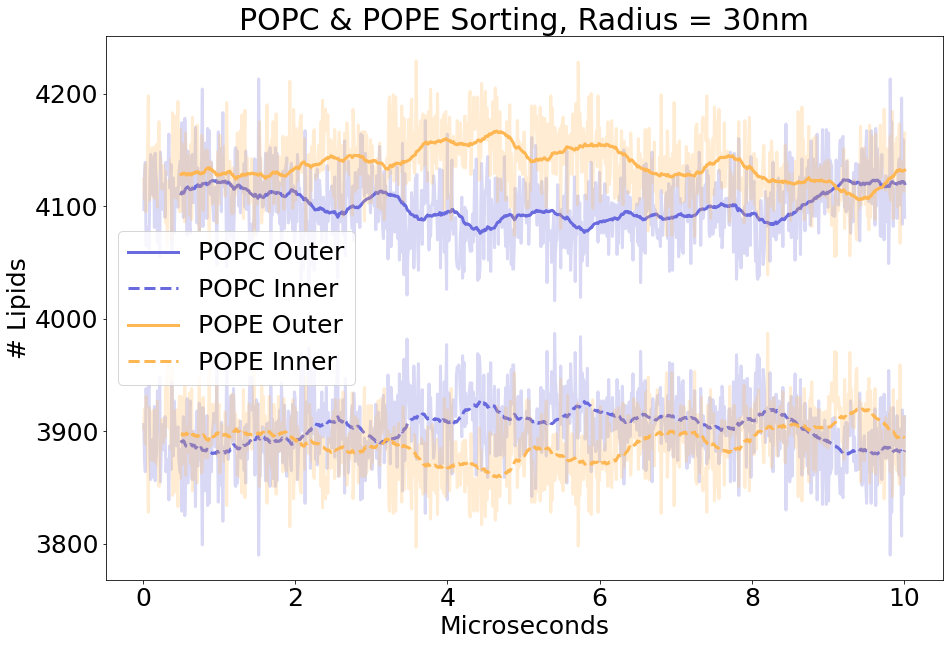

In [34]:
analysis_modules.csv_to_plot(POPC_POPE_30, ["POPC", "POPE"], title="POPC & POPE Sorting, Radius = 30nm", \
                             rolling=50, bg=True, colours=colours, index_scaling=100, x_label = "Microseconds", \
                             out=out_dir + "POPC_POPE_r30.png")

# Subplot Generation

In [141]:
def csv_to_df_scaleidx(csv, index_scaling):
    df = pd.read_csv(csv)
    df[df.columns[0]] = df[df.columns[0]]/index_scaling
    df = df.set_index(df.columns[0])
    return(df)

In [142]:
DP_10_df = csv_to_df_scaleidx(DOPC_POPC_10, 100)
DP_20_df = csv_to_df_scaleidx(DOPC_POPC_20, 100)
DP_30_df = csv_to_df_scaleidx(DOPC_POPC_30, 100)
PP_10_df = csv_to_df_scaleidx(POPC_POPE_10, 100)
PP_20_df = csv_to_df_scaleidx(POPC_POPE_20, 100)
PP_30_df = csv_to_df_scaleidx(POPC_POPE_30, 100)

dfs = [DP_10_df, DP_20_df, DP_30_df, PP_10_df, PP_20_df, PP_30_df]

In [106]:
def inner_outer_plots(axs, df, resnames, colours):
    axs.plot(df[resnames[0] + " Outer"].rolling(50).mean(), color=colours[resnames[0]], linewidth=3, linestyle="-", label= resnames[0] + " Outer")
    axs.plot(df[resnames[0] + " Inner"].rolling(50).mean(), color=colours[resnames[0]], linewidth=3, linestyle="--", label= resnames[0] + " Inner")
    axs.plot(df[resnames[1] + " Outer"].rolling(50).mean(), color=colours[resnames[1]], linewidth=3, linestyle="-", label= resnames[1] + " Outer")
    axs.plot(df[resnames[1] + " Inner"].rolling(50).mean(), color=colours[resnames[1]], linewidth=3, linestyle="--", label= resnames[1] + " Inner")
    
    axs.plot(df[resnames[0] + " Outer"], color=colours[resnames[0]], linewidth=3, linestyle="-", label= resnames[0] + " Outer", alpha=0.25)
    axs.plot(df[resnames[0] + " Inner"], color=colours[resnames[0]], linewidth=3, linestyle="--", label= resnames[0] + " Inner", alpha=0.25)
    axs.plot(df[resnames[1] + " Outer"], color=colours[resnames[1]], linewidth=3, linestyle="-", label= resnames[1] + " Outer", alpha=0.25)
    axs.plot(df[resnames[1] + " Inner"], color=colours[resnames[1]], linewidth=3, linestyle="--", label= resnames[1] + " Inner", alpha=0.25)
    

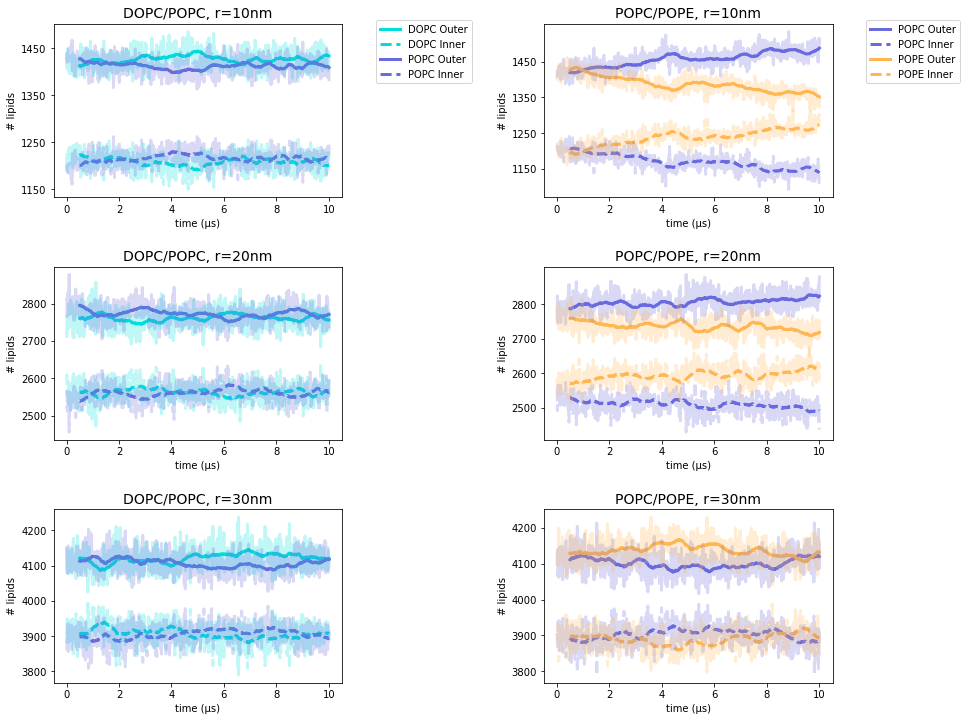

In [216]:
fig, axs = plt.subplots(3,2, figsize=(10, 10))
fig.tight_layout(pad=2.0)
fig.set_size_inches(12, 10)

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels

plt.subplots_adjust(hspace=0.4, wspace=0.7)

# DOPC/POPC r10
inner_outer_plots(axs[0][0], DP_10_df,["DOPC", "POPC"], colours)
axs[0][0].set_title("DOPC/POPC, r=10nm")
axs[0][0].set_ylabel("# lipids")
axs[0][0].set_xlabel("time (µs)")
axs[0,0].yaxis.set_ticks(np.arange(1150, 1500, 100))
axs[0,0].legend(bbox_to_anchor=(1.1, 1.05),labels=["DOPC Outer", "DOPC Inner", "POPC Outer", "POPC Inner"])

# DOPC/POPC r20
inner_outer_plots(axs[1][0], DP_20_df,["DOPC", "POPC"], colours)
axs[1][0].set_title("DOPC/POPC, r=20nm")
axs[1][0].set_ylabel("# lipids")
axs[1][0].set_xlabel("time (µs)")
axs[1,0].yaxis.set_ticks(np.arange(2500, 2900, 100))
axs[1,0].legend(bbox_to_anchor=(1.1, 1.05),labels=["DOPC Outer", "DOPC Inner", "POPC Outer", "POPC Inner"])

# DOPC/POPC r30
inner_outer_plots(axs[2][0], DP_30_df,["DOPC", "POPC"], colours)
axs[2][0].set_title("DOPC/POPC, r=30nm")
axs[2][0].set_ylabel("# lipids")
axs[2][0].set_xlabel("time (µs)")
axs[2,0].yaxis.set_ticks(np.arange(3800, 4300, 100))
axs[0,0].legend(bbox_to_anchor=(1.1, 1.05),labels=["DOPC Outer", "DOPC Inner", "POPC Outer", "POPC Inner"])

# POPC/POPE r10
inner_outer_plots(axs[0][1], PP_10_df,["POPC", "POPE"], colours)
axs[0][1].set_title("POPC/POPE, r=10nm")
axs[0][1].set_ylabel("# lipids")
axs[0][1].set_xlabel("time (µs)")
axs[0,1].yaxis.set_ticks(np.arange(1150, 1500, 100))

# POPC/POPE r20
inner_outer_plots(axs[1][1], PP_20_df,["POPC", "POPE"], colours)
axs[1][1].set_title("POPC/POPE, r=20nm")
axs[1][1].set_ylabel("# lipids")
axs[1][1].set_xlabel("time (µs)")
axs[1,1].yaxis.set_ticks(np.arange(2500, 2900, 100))

# POPC/POPE r30
inner_outer_plots(axs[2][1], PP_30_df,["POPC", "POPE"], colours)
axs[2][1].set_title("POPC/POPE, r=30nm")
axs[2][1].set_ylabel("# lipids")
axs[2][1].set_xlabel("time (µs)")
axs[2,1].yaxis.set_ticks(np.arange(3800, 4300, 100))

axs[0,1].legend(bbox_to_anchor=(1.1, 1.05),labels=["POPC Outer", "POPC Inner", "POPE Outer", "POPE Inner"])
plt.savefig(out_dir + "subplots.png")